## Forecasting Austin Rides with Kats

In [1]:
import pandas as pd
from kats.consts import TimeSeriesData
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

/data/fiona123/kats_jup/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data as pandas dataframe
df_A = pd.read_csv("/data/fiona123/Rides_DataA.csv")#, nrows = 100000)
df_B = pd.read_csv("/data/fiona123/Rides_DataB.csv")#, nrows = 100000)

df = df_A.merge(df_B)
display(df.head(5))

/data/fiona123/kats_jup/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.



,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,active_driver_id,charity_id,requested_car_category,free_credit_used,surge_factor,start_location_long,start_location_lat,rider_id,round_up_amount,promocode_redemption_id,driver_reached_on,base_fare,total_fare,rate_per_mile,rate_per_minute,time_fare,driver_accepted_on,esimtated_time_arrive,tipped_on,tip,driving_time_to_rider,dispatch_location_lat,dispatch_location_long,driving_distance_to_rider,dispatched_on,status,driver_id,car_id,color,make,model,year,car_categories_bitmask,rating
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.0,38.676,-121.039,5.0,5.0,0,NaN,b'REGULAR',NaN,0.0,-121.071,38.655,0,NaN,NaN,2016-06-04 00:14:11-05:00,1.5,25.84,1.5,0.25,2.18,NaN,NaN,NaN,NaN,NaN,-121.039,-121.039,NaN,2016-06-04 05:10:19,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.0
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.0,38.676,-121.039,5.0,5.0,0,NaN,b'REGULAR',NaN,0.0,-121.038,38.679,0,NaN,NaN,2016-06-04 01:50:02-05:00,1.5,5.00,1.5,0.25,0.41,NaN,NaN,NaN,NaN,NaN,-121.039,-121.039,NaN,2016-06-04 06:47:39,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.0
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.0,38.676,-121.039,3.0,5.0,1,NaN,b'REGULAR',NaN,0.0,-121.042,38.678,0,NaN,NaN,2016-06-04 03:16:01-05:00,1.5,5.00,1.5,0.25,0.48,NaN,NaN,NaN,NaN,NaN,-121.039,-121.039,NaN,2016-06-04 08:13:07,b'DISPATCHED',0,0,b'Gray',b'Bentley',b'Continental GT',b'2013',1,5.0
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.0,30.271,-97.742,5.0,5.0,2,NaN,b'REGULAR',NaN,0.0,-97.764,30.247,1,NaN,NaN,2016-06-04 10:01:19-05:00,1.5,8.93,1.5,0.25,2.11,NaN,NaN,NaN,NaN,NaN,-97.742,-97.742,NaN,2016-06-04 14:52:35,b'DISPATCHED',1,1,b'Black',b'Cadillac',b'XTS',b'2013',21,5.0
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.0,30.269,-97.752,5.0,5.0,2,NaN,b'REGULAR',NaN,0.0,-97.750,30.269,2,NaN,NaN,2016-06-04 10:24:15-05:00,1.5,5.00,1.5,0.25,0.43,NaN,NaN,NaN,NaN,NaN,-97.752,-97.752,NaN,2016-06-04 15:23:25,b'DISPATCHED',1,1,b'Black',b'Cadillac',b'XTS',b'2013',21,5.0


### Creating dataframe with date - frequency

In [3]:
columns = ['started_on']
new_df = df[columns].copy()
new_df['date'] = new_df['started_on'].str[:10]
display(new_df.head(5))

,started_on,date
0,2016-06-04 00:18:49-05:00,2016-06-04
1,2016-06-04 01:50:12-05:00,2016-06-04
2,2016-06-04 03:16:02-05:00,2016-06-04
3,2016-06-04 10:05:13-05:00,2016-06-04
4,2016-06-04 10:24:25-05:00,2016-06-04


In [4]:
count_df = pd.DataFrame()
count_df['count'] = new_df['date'].value_counts()
count_df['time'] = count_df.index 
display(count_df.head(5))

,count,time
2017-03-17,20576,2017-03-17
2017-03-18,19502,2017-03-18
2017-03-16,16456,2017-03-16
2017-03-12,16380,2017-03-12
2017-03-10,15077,2017-03-10


### Create timeseries data from dataframe

<AxesSubplot:xlabel='time'>

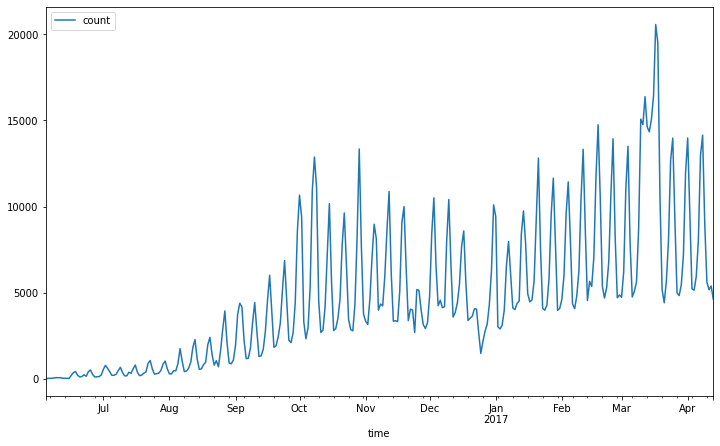

In [5]:
ts = TimeSeriesData(count_df)
ts.plot()

### Forecasting with SARIMA Model

/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:xlabel='time', ylabel='y'>

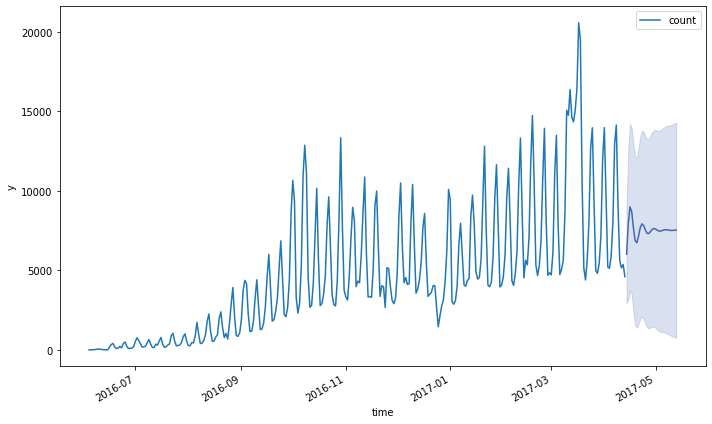

In [6]:
from kats.models.sarima import SARIMAModel, SARIMAParams

# create SARIMA param class
params = SARIMAParams(
    p = 2, 
    d=1, 
    q=1, 
    trend = 'ct'
    )

# initiate SARIMA model
m = SARIMAModel(data=ts, params=params)

# fit SARIMA model
m.fit()

# generate forecast values
fcst = m.predict(
    steps=30
    )

# make plot to visualize
# plotting the actual and forecast values
ax1 = m.plot()
ts.plot(ax=ax1)

### Forecasting with Prophet Model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.15391
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       601.378   1.16958e-05       74.2117      0.6406      0.6406      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       601.619   9.34576e-06       83.5305   1.282e-07       0.001      270  LS failed, Hessian reset 
     198        601.62   3.90015e-08       72.6175           1           1      315   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<AxesSubplot:xlabel='time', ylabel='y'>

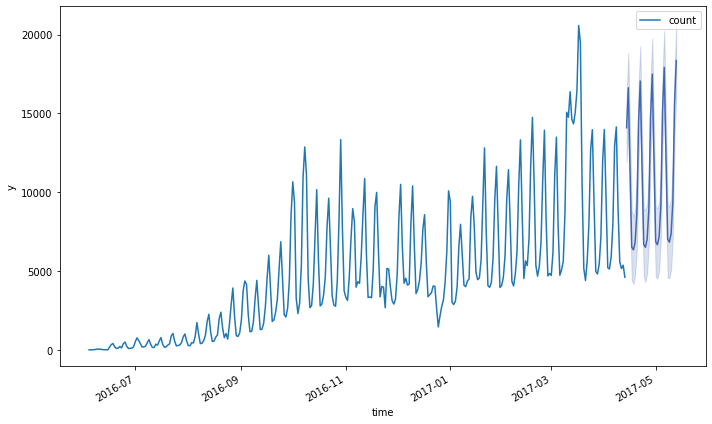

In [7]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(ts, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30)

# plotting the actual and forecast values
ax1 = m.plot()
ts.plot(ax=ax1)

### Forecasting with Holt-Winters Model

/data/fiona123/kats_jup/lib/python3.7/site-packages/kats/models/holtwinters.py:134: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/data/fiona123/kats_jup/lib/python3.7/site-packages/kats/models/holtwinters.py:134: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_re

<AxesSubplot:xlabel='time', ylabel='y'>

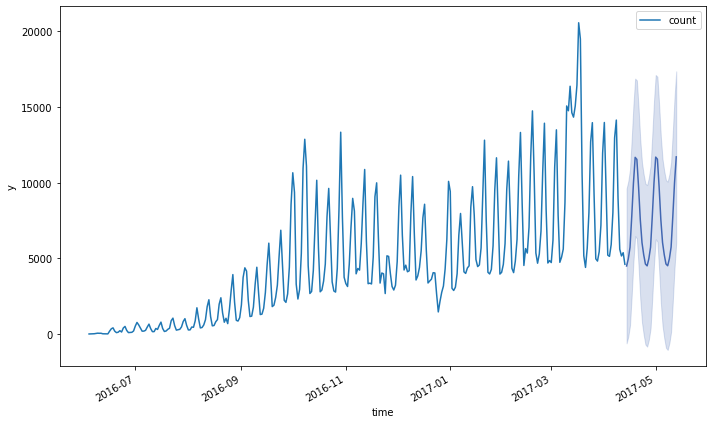

In [8]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel

params = HoltWintersParams(
            trend="add",
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=ts, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
ax1 = m.plot()
ts.plot(ax=ax1)

### Forecasting with Ensemble Model

/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
     

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08518D+00    |proj g|=  5.02887D-04

At iterate    5    f=  8.08518D+00    |proj g|=  3.96128D-05

At iterate   10    f=  8.08518D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   3.553D-07   8.085D+00
  F =   8.0851752972938122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Initial log joint probability = -4.14527
    Iter      log prob       

 This problem is unconstrained.


     116       624.284   1.52691e-05       68.7574   1.668e-07       0.001      223  LS failed, Hessian reset 
     134       624.285   2.57211e-08       60.7418      0.7175      0.7175      245   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/data/fiona123/kats_jup/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




<AxesSubplot:xlabel='time', ylabel='y'>

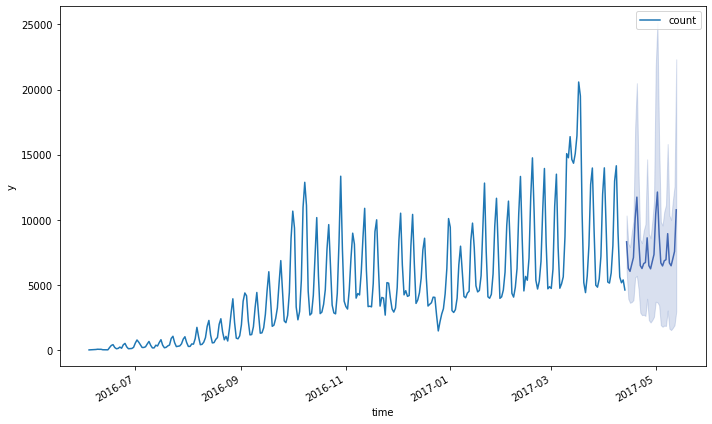

In [9]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima,
    holtwinters,
    linear_model,
    prophet,  # requires fbprophet be installed
    quadratic_model,
    sarima,
    theta,
)

# we need define params for each individual forecasting model in `EnsembleParams` class
# here we include 6 different models
model_params = EnsembleParams(
            [
                BaseModelParams("arima", arima.ARIMAParams(p=1, d=1, q=1)),
                BaseModelParams(
                    "sarima",
                    sarima.SARIMAParams(
                        p=2,
                        d=1,
                        q=1,
                        trend="ct",
                        seasonal_order=(1, 0, 1, 12),
                        enforce_invertibility=False,
                        enforce_stationarity=False,
                    ),
                ),
                BaseModelParams("prophet", prophet.ProphetParams()),  # requires fbprophet be installed
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
                BaseModelParams("theta", theta.ThetaParams(m=12)),
            ]
        )

# create `KatsEnsembleParam` with detailed configurations 
KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "median",
    "seasonality_length": 12,
    "decomposition_method": "multiplicative",
}

# create `KatsEnsemble` model
m = KatsEnsemble(
    data=ts, 
    params=KatsEnsembleParam
    )

# fit and predict
m.fit()

# predict for the next 30 steps
fcst = m.predict(steps=30)

# aggregate individual model results
m.aggregate()

# plot to visualize
ax1 = m.plot()
ts.plot(ax=ax1)